<a id='step_1'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


In [50]:
#folder names
top_audio_folders = ['MEDIAEVAL18-DevSet-Part1-Audio_features', 'MEDIAEVAL18-DevSet-Part2-Audio_features']
top_visual_folders = ['MEDIAEVAL18-DevSet-Part1-Visual_features', 'MEDIAEVAL18-DevSet-Part2-Visual_features']
top_annotated_folders = ['MEDIAEVAL18-DevSet-Part1-Fear-annotations', 'MEDIAEVAL18-DevSet-Part2-Fear-annotations']

In [31]:
#visual file storage:
# top_visual_folders/visual_features/MEDIAEVAL18_##/fc6/MEDIAEVAL18_##-<second>_fc6.txt

all_features = []

for top_vis_folder in top_visual_folders:
    vis_files = os.listdir('%s/visual_features' % top_vis_folder)
    for mov_vis in vis_files:
        if mov_vis == '.DS_Store':
            continue
        mov_frames = os.listdir('%s/visual_features/%s/fc6' % (top_vis_folder, mov_vis))
        for mov_frame in mov_frames:
            if mov_frame == '.DS_Store':
                continue
            file_name = '%s/visual_features/%s/fc6/%s' % (top_vis_folder, mov_vis, mov_frame)
            with open(file_name, 'r') as f:
                ft_array_str = f.read()
            ft_array_ = ft_array_str.split(',')
            ft_array = [float(ft) for ft in ft_array_]
            mov_number = mov_frame[12:14]
            mov_second = mov_frame[15:20]
            ft_array.append(float(mov_number))
            ft_array.append(float(mov_second))
            all_features.append(ft_array)
            
np_ft_fc6 = np.array(all_features)


In [64]:
#audio features:
#top_audio_folders/audio_features/MEDIAEVAL18_##/MEDIAEVAL18_##_<second.csv
filename = 'MEDIAEVAL18-DevSet-Part1-Audio_features/audio_features/MEDIAEVAL18_09/MEDIAEVAL18_09_00022.csv'
#raw_data = open(filename, 'rt')
#data = np.loadtxt(raw_data, delimiter=",")
#print(data.shape)
#df = pd.read_csv(filename)
#df.head()
columns = [] #1583
ft_vals_str = []

with open(filename, 'rt') as csvfile:
    audio_ft = csv.reader(csvfile, delimiter=',', quotechar='|')
    dbcount = 0
    for row in audio_ft:
        if len(row) > 1:
            ft_vals_str = row[1:]
        elif row and row[0] != '@relation SMILEfeatures' and row[0] != '@attribute name string' and row[0] != '@data':
            columns.append(row[0])
ft_vals = []
for val in ft_vals_str:
    vnum = val.split('e')[0]
    if 'e' not in val:
        ft_vals.append(float(vnum))
    elif '-' in val.split('e')[1]:
        ft_vals.append(float(vnum)*(10**(-1*float(val.split('e')[1][1:]))))
    else:
        ft_vals.append(float(vnum)*(10**(float(val.split('e')[1][1:]))))

In [10]:
filename = 'MEDIAEVAL18-DevSet-Part1-Audio_features/audio_features/MEDIAEVAL18_09/MEDIAEVAL18_09_00022.csv'
#raw_data = open(filename, 'rt')
#data = np.loadtxt(raw_data, delimiter=",")
#print(data.shape)
#df = pd.read_csv(filename)
#df.head()
columns = [] #1583
ft_vals_str = []

with open(filename, 'rt') as csvfile:
    audio_ft = csv.reader(csvfile, delimiter=',', quotechar='|')
    dbcount = 0
    for row in audio_ft:
        if len(row) > 1:
            ft_vals_str = row[1:]
        elif row and row[0] != '@relation SMILEfeatures' and row[0] != '@attribute name string' and row[0] != '@data':
            columns.append(row[0])
for c in columns:
    print(c)

@attribute pcm_loudness_sma_maxPos numeric
@attribute pcm_loudness_sma_minPos numeric
@attribute pcm_loudness_sma_amean numeric
@attribute pcm_loudness_sma_linregc1 numeric
@attribute pcm_loudness_sma_linregc2 numeric
@attribute pcm_loudness_sma_linregerrA numeric
@attribute pcm_loudness_sma_linregerrQ numeric
@attribute pcm_loudness_sma_stddev numeric
@attribute pcm_loudness_sma_skewness numeric
@attribute pcm_loudness_sma_kurtosis numeric
@attribute pcm_loudness_sma_quartile1 numeric
@attribute pcm_loudness_sma_quartile2 numeric
@attribute pcm_loudness_sma_quartile3 numeric
@attribute pcm_loudness_sma_iqr1-2 numeric
@attribute pcm_loudness_sma_iqr2-3 numeric
@attribute pcm_loudness_sma_iqr1-3 numeric
@attribute pcm_loudness_sma_percentile1.0 numeric
@attribute pcm_loudness_sma_percentile99.0 numeric
@attribute pcm_loudness_sma_pctlrange0-1 numeric
@attribute pcm_loudness_sma_upleveltime75 numeric
@attribute pcm_loudness_sma_upleveltime90 numeric
@attribute pcm_fftMag_mfcc_sma[0]_maxP

In [65]:
#lines = f.readlines()
from io import StringIO

with open(filename, 'rt') as csvfile:
    #audio_ft = csv.reader(csvfile, delimiter=',', quotechar='|')
    lines = csvfile.readlines()
    line_str = lines[-1]
    line_ft = line_str[9:]
    mov_frame = filename.split('/')[-1]
    mov_number = mov_frame[12:14]
    mov_second = mov_frame[15:20]    
    np_test = np.genfromtxt(StringIO(line_ft),delimiter=',')
    np_test = np.append(np_test, float(mov_number))
    np_test = np.append(np_test, float(mov_second))
    
#np_test

In [90]:
#top_audio_folders/audio_features/MEDIAEVAL18_##/MEDIAEVAL18_##_<second.csv

#np_ft_audio = np.array()
created_np = False

for top_aud_folder in top_audio_folders:
    aud_files = os.listdir('%s/audio_features' % top_aud_folder)
    for mov_aud in aud_files:
        if mov_aud == '.DS_Store':
            continue
        mov_frames = os.listdir('%s/audio_features/%s' % (top_aud_folder, mov_aud))
        for mov_frame in mov_frames:
            if mov_frame == '.DS_Store':
                continue
            filename = '%s/audio_features/%s/%s' % (top_aud_folder, mov_aud, mov_frame)
            with open(filename, 'rt') as csvfile:
                lines = csvfile.readlines()
                line_str = lines[-1]
                line_ft = line_str[9:]
                mov_number = mov_frame[12:14]
                mov_second = mov_frame[15:20]    
                np_test = np.genfromtxt(StringIO(line_ft),delimiter=',')
                np_test = np.append(np_test, float(mov_number))
                np_test = np.append(np_test, float(mov_second))
                if len(np_test) != 1585:
                    continue
                if not created_np:
                    created_np = True
                    np_ft_audio = np_test
                else:
                    np_ft_audio = np.vstack((np_ft_audio, np_test))
                    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: genfromtxt: Empty input file: "<_io.StringIO object at 0x11f8a4048>"
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: genfromtxt: Empty input file: "<_io.StringIO object at 0x2d58e3438>"


In [94]:
#np.savetxt('np_ft_audio.txt', np_ft_audio, delimiter=',')

In [95]:
#np.savetxt('np_ft_fc6.txt', np_ft_fc6, delimiter=',')

In [4]:
# create audio feature array for test set
from io import StringIO

created_np = False

aud_files = os.listdir('MEDIAEVAL18-TestSet-Audio_features/audio_features')
for mov_aud in aud_files:
    if mov_aud == '.DS_Store':
        continue
    mov_frames = os.listdir('MEDIAEVAL18-TestSet-Audio_features/audio_features/%s' % mov_aud)
    for mov_frame in mov_frames:
        if mov_frame == '.DS_Store':
            continue
        filename = 'MEDIAEVAL18-TestSet-Audio_features/audio_features/%s/%s' % (mov_aud, mov_frame)
        with open(filename, 'rt') as csvfile:
            lines = csvfile.readlines()
            line_str = lines[-1]
            line_ft = line_str[9:]
            mov_number = mov_frame[12:14]
            mov_second = mov_frame[15:20]    
            np_test = np.genfromtxt(StringIO(line_ft),delimiter=',')
            np_test = np.append(np_test, float(mov_number))
            np_test = np.append(np_test, float(mov_second))
            if len(np_test) != 1585:
                continue
            if not created_np:
                created_np = True
                np_ft_audio = np_test
            else:
                np_ft_audio = np.vstack((np_ft_audio, np_test))
                    


In [5]:
#np.savetxt('np_test_audio.txt', np_ft_audio, delimiter=',')

In [89]:
np_ft_audio = np.genfromtxt('np_test_audio.txt', delimiter=",")

In [15]:
#columns.append('mov_number')
#columns.append('mov_frame')


['@attribute F0final__Turn_numOnsets numeric',
 '@attribute F0final__Turn_duration numeric',
 '@attribute class numeric',
 'mov_number',
 'mov_frame']

In [17]:
test_audio_df = pd.DataFrame(data=np_ft_audio, columns=columns)
test_audio_df = test_audio_df.sort_values(['mov_number', 'mov_frame'], ascending=[True, True])
test_audio_df.head()

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr2-3 numeric,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame
37,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.019154,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,0.0
28,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.019154,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,1.0
42,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.019154,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,2.0
49,0.930754,0.164969,0.885035,0.000539,0.752955,0.207238,0.071235,0.277622,0.796806,4.086939,...,0.021808,0.040908,0.061529,0.050000,0.003571,40.0,4.93,0.0,54.0,3.0
13,0.731707,0.571138,0.985999,0.000636,0.829962,0.247835,0.101150,0.330603,0.707307,4.259560,...,0.020593,0.042855,0.107520,0.028571,0.004082,33.0,4.94,0.0,54.0,4.0


In [25]:
# add in column to audio_df for fear value

#note: format of test annotation is different:
#MEDIAEVAL18_54
#166	192
#MEDIAEVAL18_55
#116	189
#MEDIAEVAL18_56
#173	194
#MEDIAEVAL18_57
#976	1006
#MEDIAEVAL18_58
#56	80
#208	214
#235	241
#283	327   ..etc

test_audio_df['fear'] = np.nan

fear_all = []
vid_num = 0.0

with open("MEDIAEVAL18-TestSet-Fear-annotations/annotations/fear_gt.txt", "r") as f:
    vid_lines = f.readlines()
    for vline in vid_lines:
        if "MEDIAEVAL" in vline:
            if vid_num:
                fear_all = fear_all + fear_arr
            vid_num = float(vline[12:14])
            mov_df = test_audio_df[test_audio_df['mov_number'] == vid_num]
            fear_arr = [0]*len(mov_df)
            continue
        times = vline.split()
        tstart = int(times[0])
        tend = int(times[1])
        fear_arr[tstart:tend+1] = [1]*(tend-tstart+1)
fear_all = fear_all + fear_arr



In [27]:
test_audio_df['fear'] = np.array(fear_all)
test_audio_df

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
37,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,0.0,0
28,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,1.0,0
42,0.831301,0.000000,0.847205,0.000409,0.746695,0.201722,0.069313,0.269618,0.254412,4.841170,...,0.035693,0.075587,0.033333,0.006061,47.0,4.94,0.0,54.0,2.0,0
49,0.930754,0.164969,0.885035,0.000539,0.752955,0.207238,0.071235,0.277622,0.796806,4.086939,...,0.040908,0.061529,0.050000,0.003571,40.0,4.93,0.0,54.0,3.0,0
13,0.731707,0.571138,0.985999,0.000636,0.829962,0.247835,0.101150,0.330603,0.707307,4.259560,...,0.042855,0.107520,0.028571,0.004082,33.0,4.94,0.0,54.0,4.0,0
24,0.625255,0.050917,1.008923,0.000931,0.780852,0.249104,0.103310,0.347447,0.719725,3.228249,...,0.039300,0.069976,0.066667,0.008333,23.0,4.93,0.0,54.0,5.0,0
9,0.729675,0.180894,1.133797,0.000875,0.918938,0.283658,0.128675,0.379638,0.366316,3.059226,...,0.050529,0.106028,0.045045,0.009009,16.0,4.94,0.0,54.0,6.0,0
2,0.325866,0.446028,1.187750,0.000463,1.074197,0.317280,0.155287,0.399503,0.334184,2.812802,...,0.045174,0.096766,0.064516,0.032258,10.0,4.93,0.0,54.0,7.0,0
180,0.144309,0.565041,1.229220,-0.000252,1.291184,0.308102,0.145867,0.383604,0.281408,2.620567,...,0.026441,0.079934,0.057692,0.019231,7.0,4.94,0.0,54.0,8.0,0
195,0.782520,0.904471,1.219120,-0.000120,1.248676,0.298313,0.138245,0.372206,0.218510,2.665194,...,0.041182,0.077939,0.050000,0.050000,5.0,4.94,0.0,54.0,9.0,0


In [44]:
test_audio_df_new = test_audio_df.reset_index()
test_audio_df_new = test_audio_df_new.drop(columns=['index'])


In [253]:
test_audio_df_rand = test_audio_df_new.sample(frac=1).reset_index(drop=True)
test_audio_df_rand.head()

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
0,0.967480,0.565041,0.190843,0.000233,0.133653,0.088124,0.018117,0.138606,3.030205,13.599690,...,0.044686,0.132768,0.054054,0.027027,7.0,4.94,0.0,59.0,2994.0,0
1,0.502032,0.951219,0.394525,-0.000015,0.398203,0.110803,0.021924,0.148084,1.144835,6.113151,...,0.047111,0.089663,0.044492,0.008475,31.0,4.94,0.0,60.0,248.0,0
2,0.054878,0.764228,0.568578,-0.000170,0.610192,0.272146,0.131215,0.363035,1.576700,4.934156,...,0.038359,0.118337,0.040609,0.010152,17.0,4.94,0.0,65.0,493.0,0
3,0.369919,0.723577,0.627030,0.000296,0.554463,0.188387,0.062127,0.252763,1.281714,5.126209,...,0.045491,0.086130,0.088415,0.015244,24.0,4.94,0.0,61.0,4363.0,0
4,0.390244,0.926829,0.215234,-0.000271,0.281751,0.119111,0.025023,0.162801,1.753979,6.116788,...,0.046948,0.112842,0.016484,0.005495,21.0,4.94,0.0,64.0,4501.0,0


In [45]:
all_audio = np.genfromtxt('np_ft_audio.txt', delimiter=",")

In [196]:
all_audio

array([[1.731161e-01, 2.932790e-01, 7.403080e-01, ..., 0.000000e+00,
        9.000000e+00, 1.490000e+02],
       [7.418699e-01, 2.845529e-02, 3.583687e-01, ..., 0.000000e+00,
        9.000000e+00, 1.610000e+02],
       [2.682927e-01, 9.796748e-01, 3.412387e-01, ..., 0.000000e+00,
        9.000000e+00, 1.750000e+02],
       ...,
       [4.349594e-01, 8.211382e-01, 3.950420e-01, ..., 0.000000e+00,
        4.300000e+01, 1.760000e+02],
       [9.573171e-01, 6.991870e-01, 2.219055e-01, ..., 0.000000e+00,
        4.300000e+01, 1.620000e+02],
       [1.016260e-02, 3.414634e-01, 3.318292e-01, ..., 0.000000e+00,
        4.300000e+01, 6.040000e+02]])

In [48]:
audio_df = pd.DataFrame(data=all_audio, columns=columns)
audio_df = audio_df.sort_values(['mov_number', 'mov_frame'], ascending=[True, True])
#audio_df

In [51]:
# add in column to audio_df for fear value
audio_df['fear'] = np.nan

fear_all = []

#annotated files
for folder in top_annotated_folders:
    vid_annotations = os.listdir('%s/annotations' % folder)
    vid_annotations.sort()
    for file in vid_annotations:
        if file == '.DS_Store':
            continue
        #try:
        vid_num = float(file[12:14])
        #set array of length of video with values 0 for default not-scary
        mov_df = audio_df[audio_df['mov_number'] == vid_num]
        fear_arr = [0]*len(mov_df)
        with open("%s/annotations/%s" % (folder, file), "r") as f:
            vid_lines = f.readlines()
        for vline in vid_lines:
            if "Time_start" in vline:
                continue
            times = vline.split()
            tstart = int(times[0])
            tend = int(times[1])
            fear_arr[tstart:tend+1] = [1]*(tend-tstart+1)
        fear_all = fear_all + fear_arr
        
            
        #except:
        #    continue


In [52]:
audio_df['fear'] = np.array(fear_all)
audio_df

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
2987,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,0.0,0
2923,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,1.0,0
2705,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,2.0,0
2758,0.936992,0.000000,0.036727,0.000089,0.014980,0.009836,0.000164,0.017965,0.574477,3.024331,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,3.0,0
2255,0.945122,0.024390,0.045215,0.000078,0.026117,0.011886,0.000226,0.018644,0.555434,3.033253,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,4.0,0
2340,0.890244,0.030488,0.054449,0.000079,0.035031,0.013980,0.000304,0.020744,0.625148,3.086543,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,5.0,0
2558,0.993902,0.205285,0.064183,0.000106,0.038230,0.016497,0.000449,0.025972,0.989350,4.631914,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,6.0,0
2482,0.861789,0.000000,0.082375,0.000196,0.034314,0.022414,0.000841,0.040177,1.194935,4.425826,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,7.0,0
2029,0.845529,0.111789,0.103091,0.000247,0.042405,0.026940,0.001265,0.049980,0.971023,3.641108,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,8.0,0
2111,0.642276,0.144309,0.121088,0.000209,0.069771,0.031331,0.001677,0.050580,0.561026,2.755573,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,9.0,0


In [53]:
audio_df_new = audio_df.reset_index()


In [54]:
audio_df_new = audio_df_new.drop(columns=['index'])
audio_df_new

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
0,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,0.0,0
1,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,1.0,0
2,0.926380,0.000000,0.025874,0.000121,-0.003561,0.006177,0.000069,0.018954,0.266053,2.303387,...,0.000000,0.000000,0.000000,0.000000,0.0,4.91,0.0,0.0,2.0,0
3,0.936992,0.000000,0.036727,0.000089,0.014980,0.009836,0.000164,0.017965,0.574477,3.024331,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,3.0,0
4,0.945122,0.024390,0.045215,0.000078,0.026117,0.011886,0.000226,0.018644,0.555434,3.033253,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,4.0,0
5,0.890244,0.030488,0.054449,0.000079,0.035031,0.013980,0.000304,0.020744,0.625148,3.086543,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,5.0,0
6,0.993902,0.205285,0.064183,0.000106,0.038230,0.016497,0.000449,0.025972,0.989350,4.631914,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,6.0,0
7,0.861789,0.000000,0.082375,0.000196,0.034314,0.022414,0.000841,0.040177,1.194935,4.425826,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,7.0,0
8,0.845529,0.111789,0.103091,0.000247,0.042405,0.026940,0.001265,0.049980,0.971023,3.641108,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,8.0,0
9,0.642276,0.144309,0.121088,0.000209,0.069771,0.031331,0.001677,0.050580,0.561026,2.755573,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,0.0,9.0,0


In [76]:
#audio_df_new.to_csv('audio_ft_w_annotation.csv')

In [77]:
#audio_balanced_df = 
audio_df_fear = audio_df_new[audio_df_new['fear'] == 1]
audio_df_not = audio_df_new[audio_df_new['fear'] == 0]
audio_df_not = audio_df_not.sample(n=2091, random_state=1)

In [79]:
audio_balanced_df = pd.concat([audio_df_not, audio_df_fear])
audio_balanced_df = audio_balanced_df.sample(frac=1).reset_index(drop=True)
audio_balanced_df

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
0,0.048780,0.597561,0.350924,-0.001709,0.770366,0.150447,0.032536,0.302356,1.031994,2.819951,...,0.033659,0.087479,0.058252,0.019417,20.0,4.94,0.0,35.0,608.0,1
1,0.400406,0.388211,0.242142,-0.000200,0.291220,0.079631,0.010943,0.108394,1.014496,4.558449,...,0.036147,0.074410,0.047619,0.005602,23.0,4.94,0.0,34.0,499.0,0
2,0.280488,0.995935,0.513506,-0.000157,0.551930,0.107418,0.018517,0.137881,0.362255,3.596577,...,0.032929,0.082924,0.107143,0.044643,28.0,4.94,0.0,22.0,3370.0,1
3,0.902041,0.114286,0.654322,0.001165,0.369457,0.334342,0.180797,0.456024,1.132987,3.819816,...,0.024948,0.075198,0.076923,0.019231,17.0,4.92,0.0,2.0,3434.0,0
4,0.705284,0.878049,0.383935,-0.000039,0.393506,0.115227,0.021253,0.145890,0.696610,3.799411,...,0.047286,0.106373,0.064516,0.008602,18.0,4.94,0.0,6.0,2701.0,0
5,0.396342,0.134146,0.336522,0.000284,0.266796,0.206813,0.072908,0.273010,1.442613,4.473020,...,0.035134,0.093434,0.034146,0.009756,6.0,4.94,0.0,17.0,286.0,0
6,0.451219,0.512195,0.385566,0.000027,0.378961,0.092527,0.013910,0.118004,0.428634,3.538734,...,0.042925,0.055957,0.174825,0.034965,10.0,4.94,0.0,5.0,5286.0,0
7,0.400406,0.788618,0.551291,-0.000046,0.562671,0.223626,0.100239,0.316674,1.687944,6.611426,...,0.038138,0.090946,0.037433,0.005348,22.0,4.94,0.0,22.0,4312.0,1
8,0.089431,0.873984,0.619257,-0.002642,1.267914,0.346373,0.169041,0.556654,1.218331,2.938599,...,0.037201,0.148566,0.030303,0.010101,14.0,4.94,0.0,1.0,728.0,1
9,0.908537,0.959350,0.144115,0.000026,0.137773,0.038923,0.002514,0.050276,0.755336,3.896841,...,0.060554,0.128040,0.081081,0.027027,19.0,4.94,0.0,40.0,60.0,0


In [60]:
len(np.array(fear_all))

55067

In [59]:
len(np.array(audio_df_new['fear']))

55067

In [63]:
np.array_equal(np.array(fear_all), np.array(audio_df_new['fear']))

True

In [72]:
len(test_audio_df)

32160

In [73]:
fear_annot = test_audio_df[test_audio_df['fear'] == 1]
len(fear_annot)

1606

In [74]:
len(audio_df_new)

55067

In [75]:
dev_fear_annot = audio_df_new[audio_df_new['fear'] == 1]
len(dev_fear_annot)

2091

In [84]:
audio_balanced = audio_balanced_df.values
audio_balanced.shape
audio_balanced_ft = audio_balanced[:,:-3]
audio_balanced_ft.shape

(4182, 1583)

In [83]:
all_audio.shape

(55067, 1585)

In [94]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(all_audio[:,:-2], np.array(fear_all))#all_audio[:,-1])
X_train = all_audio[:,:-2]
y_train = np.array(audio_df_new['fear'])
X_test = np_ft_audio[:,:-2]
y_test = np.array(test_audio_df['fear'])#test_audio_df_new

from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.949657960199005

In [95]:

X_train = audio_balanced_ft#all_audio[:,:-2]
y_train = np.array(audio_balanced_df['fear'])#audio_df_new['fear'])
X_test = np_ft_audio[:,:-2]
y_test = np.array(test_audio_df['fear'])#test_audio_df_new

from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.8310323383084577

In [91]:
#X_train = all_audio[:,:-2]
#y_train = np.array(audio_df_new['fear'])
#X_test = np_ft_audio[:,:-2]
#y_test = np.array(test_audio_df['fear'])
y_pred = rf.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[26706,  3848],
       [ 1486,   120]])

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.87      0.91     30554
          1       0.03      0.07      0.04      1606

avg / total       0.90      0.83      0.87     32160



In [97]:
len(audio_balanced_ft)

4182

In [254]:
#test_audio_df_rand
X_train = audio_balanced_ft#all_audio[:,:-2]
y_train = np.array(audio_balanced_df['fear'])#audio_df_new['fear'])
X_test = test_audio_df_rand.values[:,:-3] #TODOTODO
y_test = np.array(test_audio_df_rand['fear'])#test_audio_df_new

rf_rand = RandomForestClassifier() 
rf_rand.fit(X_train, y_train) 
rf_rand.score(X_test, y_test)

0.8473569651741294

In [255]:
y_pred = rf_rand.predict(X_test)

In [256]:
confusion_matrix(y_test, y_pred)

array([[26947,  3607],
       [ 1302,   304]])

In [257]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.88      0.92     30554
          1       0.08      0.19      0.11      1606

avg / total       0.91      0.85      0.88     32160



In [109]:
accuracy_scale_vals = [1,2,3,4,10,20,40,80,150,250,400,600,800,1000,1500,2000,2500,3000,3500,4000]
val_scores = []
for val in accuracy_scale_vals:
    X_train_val = audio_balanced_ft[:val]#all_audio[:,:-2]
    y_train_val = np.array(audio_balanced_df['fear'])[:val]#audio_df_new['fear'])
    X_test = np_ft_audio[:,:-2]
    y_test = np.array(test_audio_df['fear'])#test_audio_df_new

    rf_val = RandomForestClassifier() 
    ## Fit the model on your training data.
    rf_val.fit(X_train_val, y_train_val) 
    ## And score it on your testing data.
    val_score = rf_val.score(X_test, y_test)
    print("%s vals score: %s" % (val, val_score))
    val_scores.append(val_score)

1 vals score: 0.04993781094527363
2 vals score: 0.4769589552238806
3 vals score: 0.14088930348258707
4 vals score: 0.3843283582089552
10 vals score: 0.7626865671641792
20 vals score: 0.5272699004975124
40 vals score: 0.7993470149253732
80 vals score: 0.6033271144278607
150 vals score: 0.7828669154228856
250 vals score: 0.7724502487562189
400 vals score: 0.7316542288557214
600 vals score: 0.7392412935323384
800 vals score: 0.7698694029850747
1000 vals score: 0.7409825870646766
1500 vals score: 0.7903606965174129
2000 vals score: 0.7898942786069652
2500 vals score: 0.8061878109452736
3000 vals score: 0.8202114427860696
3500 vals score: 0.8088619402985074
4000 vals score: 0.8287624378109453


In [112]:
epoch = []
for a in accuracy_scale_vals:
    per = float(a) / 4182.0
    epoch.append(per)

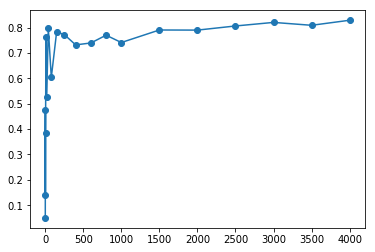

In [110]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

plt.plot(accuracy_scale_vals, val_scores, '-o')
plt.show()

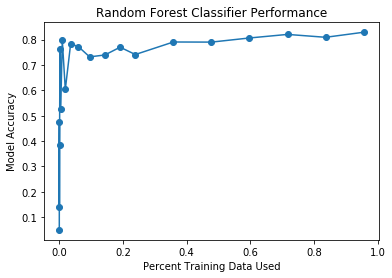

In [116]:
plt.plot(epoch, val_scores, '-o')
plt.title('Random Forest Classifier Performance')
plt.xlabel('Percent Training Data Used')
plt.ylabel('Model Accuracy')
plt.show()

In [65]:
#get most important audio features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_audio[:,:-2], np.array(fear_all))#all_audio[:,-1])


from sklearn.ensemble import RandomForestClassifier 
rf_dev = RandomForestClassifier() 
rf_dev.fit(X_train, y_train) 
rf_dev.score(X_test, y_test)

0.9620832425365003

In [138]:
important_ft = rf.feature_importances_
important_ft

array([6.80777068e-04, 0.00000000e+00, 0.00000000e+00, ...,
       9.31553428e-05, 7.17593336e-04, 0.00000000e+00])

In [139]:
hundred_important = important_ft.argsort()[-100:][::-1]
hundred_important

array([   4,   18,  632,  720,  641,    7,  730,   38,   32,  724,  390,
        773,   59,  763, 1371,  661,   33, 1377,  721,  919, 1380,  731,
        794,  761,  246, 1398,  642, 1511,  220,  558, 1435, 1255,  386,
       1578, 1518,  163,  963,  548,   44,  371,  783,  354,  583,   23,
        424,  584,   58, 1482,  327,  656,   77,  411,  712,  432,  640,
        497,  665,  155, 1457,  391,  611, 1473,  518, 1443, 1224,   52,
        979,  772,  382, 1383,  352, 1098, 1433,   72,   93, 1430,  369,
        471,   98,  367,  899,  387,  667,  137,  392,  653,  493,  687,
         81, 1231,  564,  443,  706,  165,  752,  320, 1481,  396,  569,
        416])

In [172]:
ten_important = important_ft.argsort()[-10:][::-1]
ten_important

array([  4,  18, 632, 720, 641,   7, 730,  38,  32, 724])

In [150]:
important_cols = []
for feat in hundred_important:
    important_cols.append(audio_balanced_df[columns[feat]])#audio_df[columns[feat]])
important_cols.append(audio_balanced_df['mov_number'])
important_cols.append(audio_balanced_df['mov_frame'])
important_cols.append(audio_balanced_df['fear'])

In [175]:
important_cols = []
for feat in ten_important:
    important_cols.append(test_audio_df[columns[feat]])#audio_balanced_df[columns[feat]])#audio_df[columns[feat]])
important_cols.append(test_audio_df['mov_number'])
important_cols.append(test_audio_df['mov_frame'])
important_cols.append(test_audio_df['fear'])

In [176]:
audio_ten_test = pd.concat(important_cols, axis=1)

In [149]:
audio_hundred_test = pd.concat(important_cols, axis=1)


In [174]:
audio_ten_bal = pd.concat(important_cols, axis=1)

In [151]:
audio_hundred_bal = pd.concat(important_cols, axis=1)
audio_hundred_bal

,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_pctlrange0-1 numeric,@attribute lspFreq_sma[6]_amean numeric,@attribute pcm_loudness_sma_de_linregerrQ numeric,@attribute lspFreq_sma[6]_quartile2 numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_de_percentile1.0 numeric,@attribute pcm_fftMag_mfcc_sma[0]_percentile99.0 numeric,@attribute pcm_fftMag_mfcc_sma[0]_quartile2 numeric,@attribute pcm_loudness_sma_de_quartile1 numeric,...,@attribute pcm_fftMag_mfcc_sma[6]_pctlrange0-1 numeric,@attribute pcm_fftMag_mfcc_sma_de[0]_percentile99.0 numeric,@attribute pcm_fftMag_mfcc_sma[14]_linregerrA numeric,@attribute jitterDDP_sma_iqr1-3 numeric,@attribute logMelFreqBand_sma[2]_pctlrange0-1 numeric,@attribute lspFreq_sma[3]_amean numeric,@attribute logMelFreqBand_sma[3]_percentile99.0 numeric,mov_number,mov_frame,fear
0,0.770366,1.100824,1.704507,0.002515,1.705922,0.302356,-0.169626,6.465656,-42.608200,-0.017077,...,41.37663,2.803289,4.777726,0.000000,11.781110,0.981733,3.608779,35.0,608.0,1
1,0.291220,0.487684,1.540446,0.000865,1.543320,0.108394,-0.074890,-19.292260,-44.398380,-0.019855,...,32.57538,5.561177,5.882699,0.169672,7.496682,0.931382,-0.049723,34.0,499.0,0
2,0.551930,0.660121,1.735274,0.001924,1.736720,0.137881,-0.102143,9.168646,-27.203880,-0.031875,...,25.95020,5.321900,2.792693,0.000000,4.536622,0.987895,1.765100,22.0,3370.0,1
3,0.369457,1.893920,1.558662,0.010824,1.579539,0.456024,-0.280346,-1.523229,-32.401690,-0.044529,...,107.91810,8.356016,8.436208,0.018249,10.108260,1.016863,3.400108,2.0,3434.0,0
4,0.393506,0.704966,1.669338,0.002582,1.674895,0.145890,-0.125359,-36.815590,-41.262100,-0.035626,...,65.47926,2.019255,8.328075,0.248550,3.169977,0.926539,-1.506362,6.0,2701.0,0
5,0.266796,1.180993,1.560574,0.003084,1.558936,0.273010,-0.158516,-6.451862,-29.469840,-0.022764,...,49.83662,5.308067,5.323431,0.030717,7.759187,0.968232,2.992545,17.0,286.0,0
6,0.378961,0.584558,1.580128,0.001782,1.581800,0.118004,-0.113780,-4.894902,-16.288010,-0.026366,...,50.44794,2.776549,3.647880,0.030830,4.804074,1.138890,1.022710,5.0,5286.0,0
7,0.562671,1.631978,1.694912,0.005370,1.699696,0.316674,-0.199169,9.010144,-22.019700,-0.038203,...,55.66347,4.444535,5.055365,0.027966,8.090879,1.097293,4.229517,22.0,4312.0,1
8,1.267914,1.764622,1.666766,0.002889,1.585040,0.556654,-0.136492,-6.559619,-26.507950,-0.028465,...,46.72958,4.395885,4.900251,0.039077,9.582112,0.986630,3.077238,1.0,728.0,1
9,0.137773,0.235134,1.748211,0.000359,1.702327,0.050276,-0.047657,-40.617990,-67.815380,-0.011137,...,23.10220,5.443848,2.946249,0.000000,6.358061,1.038642,-3.791297,40.0,60.0,0


In [147]:
audio_hundred_ft.to_csv('audio_ft_hundred_test.csv')

In [161]:
audio_hundred_bal_np = audio_hundred_bal.values
audio_hundred_bal_np

array([[7.703659e-01, 1.100824e+00, 1.704507e+00, ..., 3.500000e+01,
        6.080000e+02, 1.000000e+00],
       [2.912202e-01, 4.876838e-01, 1.540446e+00, ..., 3.400000e+01,
        4.990000e+02, 0.000000e+00],
       [5.519302e-01, 6.601207e-01, 1.735274e+00, ..., 2.200000e+01,
        3.370000e+03, 1.000000e+00],
       ...,
       [1.517134e+00, 1.933769e+00, 1.709346e+00, ..., 2.200000e+01,
        2.982000e+03, 1.000000e+00],
       [7.083969e-01, 1.711338e+00, 1.725550e+00, ..., 2.200000e+01,
        3.965000e+03, 1.000000e+00],
       [4.161088e-01, 1.027409e+00, 1.695848e+00, ..., 2.200000e+01,
        1.889000e+03, 1.000000e+00]])

In [258]:
test_hundred_rand = audio_hundred_test.sample(frac=1).reset_index(drop=True)
test_hundred_rand.head()

,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_pctlrange0-1 numeric,@attribute lspFreq_sma[6]_amean numeric,@attribute pcm_loudness_sma_de_linregerrQ numeric,@attribute lspFreq_sma[6]_quartile2 numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_de_percentile1.0 numeric,@attribute pcm_fftMag_mfcc_sma[0]_percentile99.0 numeric,@attribute pcm_fftMag_mfcc_sma[0]_quartile2 numeric,@attribute pcm_loudness_sma_de_quartile1 numeric,...,@attribute pcm_fftMag_mfcc_sma[6]_pctlrange0-1 numeric,@attribute pcm_fftMag_mfcc_sma_de[0]_percentile99.0 numeric,@attribute pcm_fftMag_mfcc_sma[14]_linregerrA numeric,@attribute jitterDDP_sma_iqr1-3 numeric,@attribute logMelFreqBand_sma[2]_pctlrange0-1 numeric,@attribute lspFreq_sma[3]_amean numeric,@attribute logMelFreqBand_sma[3]_percentile99.0 numeric,mov_number,mov_frame,fear
0,0.462899,1.032133,1.697199,0.002254,1.697868,0.182125,-0.132639,-1.669900,-28.32042,-0.023024,...,58.40106,2.685424,4.450363,0.062315,8.028770,1.075057,4.348021,64.0,3748.0,0
1,0.480836,0.881934,1.675095,0.002916,1.680279,0.196018,-0.143933,-5.731982,-21.46185,-0.029877,...,74.49361,4.492566,6.277204,0.020005,6.919358,1.003932,2.116981,62.0,1971.0,0
2,0.247369,0.458482,1.574665,0.000638,1.576551,0.090073,-0.064405,-27.397670,-44.49257,-0.016084,...,66.58897,2.538015,4.733887,0.067911,6.091641,0.993001,-0.714114,61.0,1342.0,0
3,0.307724,1.425076,1.578575,0.003983,1.580183,0.285166,-0.181512,-3.086740,-26.05071,-0.023936,...,30.09076,2.535979,4.088898,0.225419,5.337595,1.000364,1.133167,59.0,2497.0,0
4,0.233628,0.760900,1.715898,0.001437,1.718776,0.140527,-0.104659,-10.319470,-22.82384,-0.020425,...,22.31639,0.910210,3.053711,0.006216,2.231752,1.126844,-0.897987,64.0,4866.0,0


In [259]:
test_hundred_rand_np = test_hundred_rand.values


In [152]:
audio_hundred_test_np = audio_hundred_test.values
audio_hundred_test_np

array([[7.466947e-01, 1.592901e+00, 1.576751e+00, ..., 5.400000e+01,
        0.000000e+00, 0.000000e+00],
       [7.466947e-01, 1.592901e+00, 1.576751e+00, ..., 5.400000e+01,
        1.000000e+00, 0.000000e+00],
       [7.466947e-01, 1.592901e+00, 1.576751e+00, ..., 5.400000e+01,
        2.000000e+00, 0.000000e+00],
       ...,
       [9.757420e-01, 1.419999e+00, 1.579433e+00, ..., 6.500000e+01,
        5.557000e+03, 0.000000e+00],
       [8.824865e-01, 1.326176e+00, 1.578297e+00, ..., 6.500000e+01,
        5.558000e+03, 0.000000e+00],
       [9.794718e-01, 1.462660e+00, 1.573014e+00, ..., 6.500000e+01,
        5.559000e+03, 0.000000e+00]])

In [179]:
audio_ten_test_np = audio_ten_test.values
audio_ten_bal_np = audio_ten_bal.values

In [166]:
print(audio_hundred_bal_np.shape)
print(audio_hundred_test_np.shape)

(4182, 103)
(32160, 103)


In [299]:
#get most important audio features
#X_train, X_test, y_train, y_test = train_test_split(audio_hundred_bal_np[:,:-3], audio_hundred_bal_np[:,-1])#all_audio[:,-1])
X_train = audio_hundred_bal_np[:,:-3]#all_audio[:,:-2]
y_train = audio_hundred_bal_np[:,-1]
X_test = audio_hundred_test_np[:,:-3]
y_test = audio_hundred_test_np[:,-1]

## Import the random forest model.
## This line instantiates the model. 
rf = RandomForestClassifier(n_estimators=500) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

0.8644278606965174

In [300]:
#using test data
y_pred = rf.predict(X_test)

In [301]:
confusion_matrix(y_test, y_pred)

array([[27434,  3120],
       [ 1240,   366]])

In [298]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.96      0.90      0.93     30554
        1.0       0.10      0.22      0.14      1606

avg / total       0.91      0.86      0.89     32160



In [302]:
rf.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [324]:
#with random test_hundred_rand_np
X_train = audio_hundred_bal_np[:,:-3]#all_audio[:,:-2]
y_train = audio_hundred_bal_np[:,-1]
X_test = test_hundred_rand_np[:,:-3]
y_test = test_hundred_rand_np[:,-1]

rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)#X_test, y_test)

0.8409514925373134

In [318]:
y_pred = rf.predict(X_test)#X_test)

In [320]:
confusion_matrix(y_test, y_pred)

array([[2082,    9],
       [  10, 2081]])

In [321]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2091
        1.0       1.00      1.00      1.00      2091

avg / total       1.00      1.00      1.00      4182



In [180]:
#with ten
X_train = audio_ten_bal_np[:,:-3]#all_audio[:,:-2]
y_train = audio_ten_bal_np[:,-1]
X_test = audio_ten_test_np[:,:-3]
y_test = audio_ten_test_np[:,-1]

## Import the random forest model.
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

0.741044776119403

In [163]:
#using test_train_split
y_pred = rf.predict(X_test)

In [164]:
confusion_matrix(y_test, y_pred)

array([[456,  52],
       [ 91, 447]])

In [165]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.83      0.90      0.86       508
        1.0       0.90      0.83      0.86       538

avg / total       0.87      0.86      0.86      1046



In [88]:
#get most important audio features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(audio_hundred_ft_np[:,:-3], audio_hundred_ft_np[:,-1])#all_audio[:,-1])

from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
rf.score(X_test, y_test)

0.9676763274496986

In [90]:
y_pred = rf.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13201,     4],
       [  441,   121]])

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98     13205
        1.0       0.97      0.22      0.35       562

avg / total       0.97      0.97      0.96     13767



In [100]:
rf.score(X_train,y_train)

0.9958595641646489

In [97]:
y_pred_dumb = rf.predict(X_train)

In [98]:
confusion_matrix(y_train, y_pred_dumb)

array([[39771,     0],
       [  171,  1358]])

In [99]:
print(classification_report(y_train, y_pred_dumb))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     39771
        1.0       1.00      0.89      0.94      1529

avg / total       1.00      1.00      1.00     41300



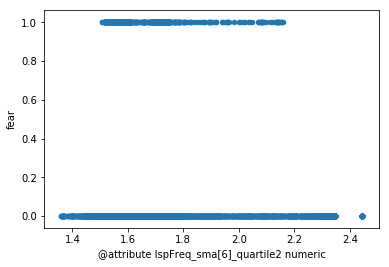

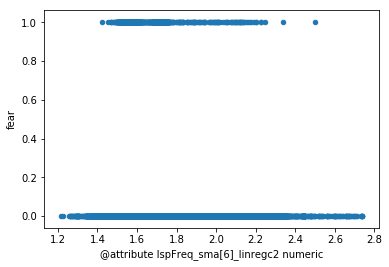

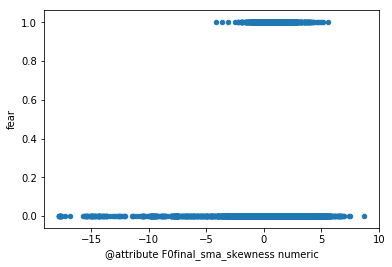

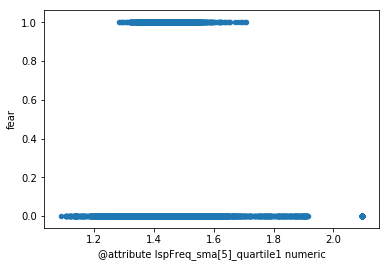

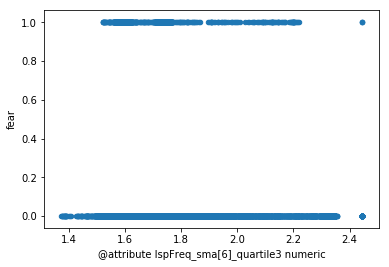

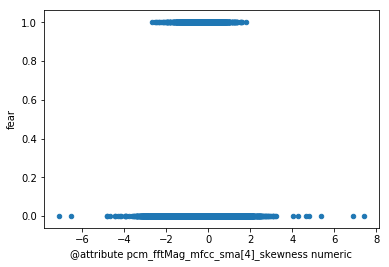

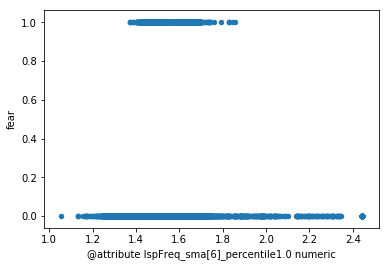

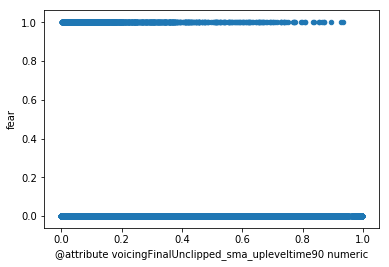

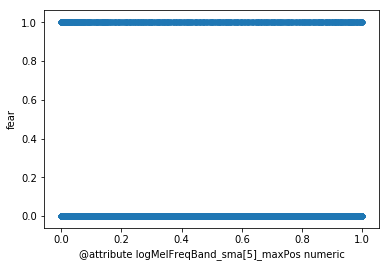

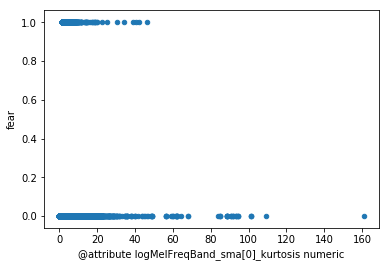

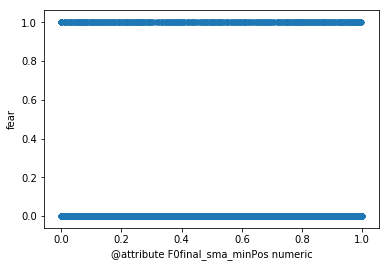

In [96]:
#plot top ten columns
col_count = 0
for col in audio_hundred_ft.columns:
    audio_hundred_ft.plot.scatter(x=col,y='fear')
    col_count += 1
    if col_count > 10:
        break

In [127]:
#TODO try imagenet with top layer removed on frames
frame_dir_top = 'MEDIAEVAL18-DevSet-Part1-Data/data/'
#frame_dirs = ['MEDIAEVAL18_00','MEDIAEVAL18_01','MEDIAEVAL18_02','MEDIAEVAL18_03',
#              'MEDIAEVAL18_07','MEDIAEVAL18_08','MEDIAEVAL18_10']
frame_dirs = ['MEDIAEVAL18_00','MEDIAEVAL18_01','MEDIAEVAL18_02','MEDIAEVAL18_03']

In [306]:
#from vgg16 import VGG16
#TODO get imports working
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
#from imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers.convolutional import Convolution2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.models import Model
from multiprocessing import Pool
import os
import time
from sklearn.model_selection import train_test_split


# get image featuers

model_old = VGG16(weights='imagenet', include_top=False)   #NOTE: include_top=False removes top layer from CNN (3)


def get_input_feature(img_path):
    img = image.load_img(img_path)
    x = image.img_to_array(img)
    print(x.shape)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    print(x.shape)
    features = model_old.predict(x)
    return features[0]




In [307]:
# train
all_figures = []
#trainLabels = []
trainData_test = []

for dir_ in frame_dirs:
    mov_files = os.listdir('%s%s' % (frame_dir_top, dir_))
    print("%s: %s" % (dir_,len(mov_files)))
    for frame in mov_files:
        a = get_input_feature('%s%s/%s' % (frame_dir_top, dir_, frame))
        trainData_test.append(a[:][0])
        print(a.shape)
        break


MEDIAEVAL18_07: 212
(360, 640, 3)
(1, 360, 640, 3)
(11, 20, 512)
MEDIAEVAL18_08: 212
(360, 640, 3)
(1, 360, 640, 3)
(11, 20, 512)
MEDIAEVAL18_10: 212
(360, 640, 3)
(1, 360, 640, 3)
(11, 20, 512)


In [244]:
a.shape

(11, 20, 512)

In [124]:
len(y_pred)

32160

In [135]:
dir_top = 'MEDIAEVAL18-DevSet-Part1-Audio_features/audio_features'
#frame_dirs = os.listdir(dir_top)
frame_dirs = ['MEDIAEVAL18_07','MEDIAEVAL18_08','MEDIAEVAL18_10']
#print(frame_dirs)
for dir_ in frame_dirs:
    if dir_ == '.DS_Store':
        continue
    mov_files = os.listdir('%s/%s' % (dir_top, dir_))
    print("%s: %s" % (dir_,len(mov_files)))

MEDIAEVAL18_07: 209
MEDIAEVAL18_08: 208
MEDIAEVAL18_10: 209


In [126]:
aud_pred_labels = y_pred[:14556]
len(aud_pred_labels)

14556

In [8]:
np_train = np.asarray(trainData)
np_train.shape

(14556,)

In [9]:
np.save('np_cnn_top_false_0123', np_train)

In [117]:
cnn_top_7810 = np.load('np_cnn_top_false_7810.npy')

In [118]:
cnn_top_7810.shape

(636, 20, 512)

In [119]:
cnn_top_0123 = np.load('np_cnn_top_false_0123.npy')

In [122]:
cnn_top_0123[0].shape

(20, 512)

In [123]:
len(cnn_top_0123)

14556

In [137]:
print(cnn_top_0123.shape)
print(cnn_top_0123[0].shape)

(14556,)
(20, 512)


In [188]:
test_one = cnn_top_0123[0].reshape((1, 20, 512))


In [189]:
print(test_one.shape)
test_one

(1, 20, 512)


array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
         27.026424 ,  9.227888 ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          5.4604325,  0.       ]]], dtype=float32)

In [181]:
#add content from _00 to _7810
vid_00 = cnn_top_0123[:3520]
vid_00.shape

(3520,)

In [182]:
vid_train = cnn_top_0123[3520:]
vid_train.shape

(11036,)

In [190]:
for i in range(3520):
    one_layer = cnn_top_0123[i].reshape((1, 20, 512))
    cnn_top_7810 = np.vstack((cnn_top_7810, one_layer))
cnn_top_7810.shape

(4156, 20, 512)

In [194]:
cnn_top_123 = cnn_top_0123[3520].reshape((1, 20, 512))
cnn_top_123.shape

(1, 20, 512)

In [195]:
for i in range(3521, 14556):
    try:
        one_layer = cnn_top_0123[i].reshape((1, 20, 512))
        cnn_top_123 = np.vstack((cnn_top_123, one_layer))
    except:
        print("problem with %s" % i)
cnn_top_123.shape

problem with 4366
problem with 4367
problem with 4368
problem with 4369
problem with 4370
problem with 4371
problem with 4372
problem with 4373
problem with 4374
problem with 4375
problem with 4376
problem with 4377
problem with 4378
problem with 4379
problem with 4380
problem with 4381
problem with 4382
problem with 4383
problem with 4384
problem with 4385
problem with 4386
problem with 4387
problem with 4388
problem with 4389
problem with 4390
problem with 4391
problem with 4392
problem with 4393
problem with 4394
problem with 4395
problem with 4396
problem with 4397
problem with 4398
problem with 4399
problem with 4400
problem with 4401
problem with 4402
problem with 4403
problem with 4404
problem with 4405
problem with 4406
problem with 4407
problem with 4408
problem with 4409
problem with 4410
problem with 4411
problem with 4412
problem with 4413
problem with 4414
problem with 4415
problem with 4416
problem with 4417
problem with 4418
problem with 4419
problem with 4420
problem wi

problem with 7032
problem with 7033
problem with 7034
problem with 7035
problem with 7036
problem with 7037
problem with 7038
problem with 7039
problem with 7040
problem with 7041
problem with 7042
problem with 7043
problem with 7044
problem with 7045
problem with 7046
problem with 7047
problem with 7048
problem with 7049
problem with 7050
problem with 7051
problem with 7052
problem with 7053
problem with 7054
problem with 7055
problem with 7056
problem with 7057
problem with 7058
problem with 7059
problem with 7060
problem with 7061
problem with 7062
problem with 7063
problem with 7064
problem with 7065
problem with 7066
problem with 7067
problem with 7068
problem with 7069
problem with 7070
problem with 7071
problem with 7072
problem with 7073
problem with 7074
problem with 7075
problem with 7076
problem with 7077
problem with 7078
problem with 7079
problem with 7080
problem with 7081
problem with 7082
problem with 7083
problem with 7084
problem with 7085
problem with 7086
problem wi

(6311, 20, 512)

In [198]:
#audio_df
#fear annot from 1,3
fear13 = pd.concat([audio_df[audio_df['mov_number'] == 1.0], audio_df[audio_df['mov_number'] == 3.0]])
fear13


,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
4772,0.955010,0.000000,0.679677,0.002536,0.060897,0.088053,0.012489,0.375023,0.289123,1.930831,...,0.051892,0.132253,0.072072,0.027027,25.0,4.91,0.0,1.0,0.0,0
4726,0.955010,0.000000,0.679677,0.002536,0.060897,0.088053,0.012489,0.375023,0.289123,1.930831,...,0.051892,0.132253,0.072072,0.027027,25.0,4.91,0.0,1.0,1.0,0
4678,0.955010,0.000000,0.679677,0.002536,0.060897,0.088053,0.012489,0.375023,0.289123,1.930831,...,0.051892,0.132253,0.072072,0.027027,25.0,4.91,0.0,1.0,2.0,0
4720,0.902439,0.020325,0.916665,0.002536,0.294199,0.090011,0.013099,0.377862,-0.086599,1.729788,...,0.051233,0.111101,0.112903,0.032258,17.0,4.94,0.0,1.0,3.0,0
4580,0.975610,0.024390,1.129501,0.002212,0.586383,0.107482,0.018066,0.341749,-0.542767,2.353623,...,0.050584,0.102295,0.083333,0.083333,9.0,4.94,0.0,1.0,4.0,0
4624,0.939024,0.000000,1.315539,0.001442,0.961623,0.098292,0.014517,0.237569,-0.537926,2.293120,...,0.034995,0.029646,0.375000,0.250000,1.0,4.94,0.0,1.0,5.0,0
4672,0.981707,0.091463,1.453970,0.001060,1.193855,0.100113,0.015132,0.194364,-0.053630,3.538167,...,0.034995,0.029646,0.375000,0.250000,1.0,4.94,0.0,1.0,6.0,0
4632,0.804878,0.042683,1.568552,0.000980,1.328056,0.107678,0.017482,0.191939,0.478456,3.018781,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,1.0,7.0,0
4120,0.601626,0.168699,1.625899,0.000618,1.474212,0.107273,0.018890,0.163068,0.415627,3.199419,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,1.0,8.0,0
4169,0.398374,0.004065,1.642884,0.000043,1.632393,0.110574,0.021408,0.146440,0.719622,3.406160,...,0.000000,0.000000,0.000000,0.000000,0.0,4.94,0.0,1.0,9.0,0


In [215]:
#MEDIAEVAL18_00: 3520
#MEDIAEVAL18_01: 846
#MEDIAEVAL18_03: 5465
#MEDIAEVAL18_07: 209
#MEDIAEVAL18_08: 208
#MEDIAEVAL18_10: 209

#1,3,   7,8,10,0
fear1_df = audio_df[audio_df['mov_number'] == 1.0]
fear1 = [0]*(846-len(fear1_df))+list(fear1_df['fear'])
fear3_df = audio_df[audio_df['mov_number'] == 3.0]
fear3 = [0]*(5465-len(fear3_df))+list(fear3_df['fear'])

fear7_df = audio_df[audio_df['mov_number'] == 7.0]
fear7 = [0]*(211-len(fear7_df))+list(fear7_df['fear'])
fear8_df = audio_df[audio_df['mov_number'] == 8.0]
fear8 = [0]*(210-len(fear8_df))+list(fear8_df['fear'])
fear10_df = audio_df[audio_df['mov_number'] == 10.0]
fear10 = [0]*(211-len(fear10_df))+list(fear10_df['fear'])
fear0_df = audio_df[audio_df['mov_number'] == 0.0]
fear0 = [0]*(3524-len(fear0_df))+list(fear0_df['fear'])

In [199]:
#fear from 7,8,10,00
fear7810 = pd.concat([audio_df[audio_df['mov_number'] == 7.0], audio_df[audio_df['mov_number'] == 8.0],
                     audio_df[audio_df['mov_number'] == 10.0], audio_df[audio_df['mov_number'] == 0.0]])
fear7810

,@attribute pcm_loudness_sma_maxPos numeric,@attribute pcm_loudness_sma_minPos numeric,@attribute pcm_loudness_sma_amean numeric,@attribute pcm_loudness_sma_linregc1 numeric,@attribute pcm_loudness_sma_linregc2 numeric,@attribute pcm_loudness_sma_linregerrA numeric,@attribute pcm_loudness_sma_linregerrQ numeric,@attribute pcm_loudness_sma_stddev numeric,@attribute pcm_loudness_sma_skewness numeric,@attribute pcm_loudness_sma_kurtosis numeric,...,@attribute shimmerLocal_sma_de_iqr1-3 numeric,@attribute shimmerLocal_sma_de_percentile99.0 numeric,@attribute shimmerLocal_sma_de_upleveltime75 numeric,@attribute shimmerLocal_sma_de_upleveltime90 numeric,@attribute F0final__Turn_numOnsets numeric,@attribute F0final__Turn_duration numeric,@attribute class numeric,mov_number,mov_frame,fear
380,0.932927,0.000000,0.553440,0.000224,0.498425,0.129380,0.030494,0.177503,0.431798,5.467754,...,0.035857,0.096102,0.037415,0.010204,42.0,4.94,0.0,7.0,0.0,0
385,0.932927,0.000000,0.553440,0.000224,0.498425,0.129380,0.030494,0.177503,0.431798,5.467754,...,0.035857,0.096102,0.037415,0.010204,42.0,4.94,0.0,7.0,1.0,0
372,0.932927,0.000000,0.553440,0.000224,0.498425,0.129380,0.030494,0.177503,0.431798,5.467754,...,0.035857,0.096102,0.037415,0.010204,42.0,4.94,0.0,7.0,2.0,0
367,0.934827,0.136456,0.564632,0.000450,0.454464,0.141760,0.032554,0.191354,0.949803,4.889050,...,0.031127,0.097206,0.036530,0.018265,35.0,4.93,0.0,7.0,3.0,0
398,0.985772,0.691057,0.597076,0.000415,0.495232,0.156460,0.040265,0.209133,0.851517,3.921278,...,0.035609,0.086871,0.041284,0.004587,33.0,4.94,0.0,7.0,4.0,0
395,0.527495,0.334012,0.656495,0.000508,0.532109,0.171484,0.050519,0.236003,0.896045,3.925127,...,0.044481,0.095575,0.044304,0.006329,23.0,4.93,0.0,7.0,5.0,0
407,0.528455,0.250000,0.691128,0.000431,0.585220,0.192405,0.057295,0.247081,0.528321,2.919925,...,0.029659,0.042134,0.206897,0.045977,16.0,4.94,0.0,7.0,6.0,0
412,0.625255,0.338085,0.737950,0.000340,0.654720,0.197729,0.063541,0.256632,0.594278,3.115931,...,0.046427,0.084678,0.078431,0.039216,9.0,4.93,0.0,7.0,7.0,0
228,0.630081,0.359756,0.767260,0.000028,0.760379,0.185542,0.054103,0.232635,0.431073,3.183461,...,0.065609,0.073831,0.189189,0.054054,7.0,4.94,0.0,7.0,8.0,0
227,0.217480,0.282520,0.752157,0.000062,0.736850,0.180350,0.052230,0.228711,0.432692,3.145893,...,0.039622,0.063521,0.121212,0.030303,5.0,4.94,0.0,7.0,9.0,0


In [238]:
#problem from 4366 to 9090
#skip data from MEDIAEVAL18_02 - weird dimensions for some reason

trainData = cnn_top_123
trainLabels = np.array(fear1+fear3)#fear annot from 1,3
testData = cnn_top_7810
testLabels = np.array(fear7+fear8+fear10+fear0)#fear from 7,8,10,00

In [315]:
input_shape = model_old.output_shape

In [234]:
cnn_top_arr = []
for i in range(6311):
    cnn_top_arr.append(cnn_top_123[0])


In [239]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.optimizers import SGD

model = Sequential()
model.add(InputLayer(input_shape=(512,)))
model.add(Dense(4096, activation='relu', input_dim=512))
model.add(Dropout(0.3))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-2), metrics=['accuracy'])

In [ ]:
modelfit = model.fit(x=trainData, y=trainLabels, epochs=5, batch_size=32, verbose=1)

In [ ]:
score = model.evaluate(testData, testLabels, verbose=1)